In [2]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from keras.models import Sequential

In [2]:
root_path="C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_20seeds"
class_names = sorted(os.listdir(root_path))[:-1]
class_names

['IR20',
 'adt37',
 'amman',
 'andhra bpt',
 'eramalli',
 'karuppu kavuni',
 'keerthi',
 'mtu 1010',
 'mtu 1290',
 'narmadha',
 'pacha ponni']

In [3]:
file_path ="C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_20seeds"

In [4]:
filepaths= list(glob.glob(file_path+'/**/*.*'))

In [5]:
print(filepaths[0:2])

['C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_20seeds\\adt37\\adt37 (1).jpg', 'C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_20seeds\\adt37\\adt37 (10).jpg']


In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [7]:
labels

['adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',


In [8]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data= data.sample(frac=1).reset_index(drop=True)
data.head(12)

,Filepath,Label
0,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,mtu 1010
1,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,adt37
2,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,andhra bpt
3,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,IR20
4,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,pacha ponni
5,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,karuppu kavuni
6,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,sonna masur
7,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,IR20
8,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,pacha ponni
9,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,IR20


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'mtu 1010'),
  Text(1, 0, 'adt37'),
  Text(2, 0, 'andhra bpt'),
  Text(3, 0, 'IR20'),
  Text(4, 0, 'pacha ponni'),
  Text(5, 0, 'karuppu kavuni'),
  Text(6, 0, 'sonna masur'),
  Text(7, 0, 'narmadha'),
  Text(8, 0, 'eramalli'),
  Text(9, 0, 'amman'),
  Text(10, 0, 'mtu 1290'),
  Text(11, 0, 'keerthi')])

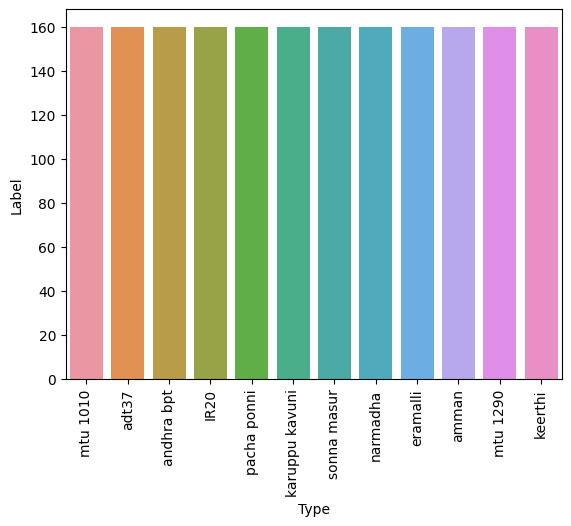

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [10]:
train, test= train_test_split(data, test_size=0.30, random_state=42)

In [11]:
test, valid = train_test_split(test, test_size=0.5, random_state=42)

In [12]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=180,
    width_shift_range=1.0,
    height_shift_range=1.0,
    shear_range=0.7,
    zoom_range=0.7,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=180,
    width_shift_range=1.0,
    height_shift_range=1.0,
    shear_range=0.7,
    zoom_range=0.7,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=40
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=40
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
)

Found 1344 validated image filenames belonging to 12 classes.
Found 288 validated image filenames belonging to 12 classes.
Found 288 validated image filenames belonging to 12 classes.


In [3]:
model = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', input_shape=(512, 512, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(12, activation='softmax')
])

model.summary()

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 256, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       1

In [15]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=2,
                             mode='auto')]

In [16]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100
21/21 [==============================] - 512s 22s/step - loss: 2.4581 - accuracy: 0.1287 - val_loss: 2.5299 - val_accuracy: 0.0903
Epoch 2/100
21/21 [==============================] - 396s 19s/step - loss: 2.2795 - accuracy: 0.2046 - val_loss: 2.4868 - val_accuracy: 0.0903
Epoch 3/100
21/21 [==============================] - 383s 18s/step - loss: 2.1625 - accuracy: 0.2530 - val_loss: 2.4349 - val_accuracy: 0.0903
Epoch 4/100
21/21 [==============================] - 370s 18s/step - loss: 2.0813 - accuracy: 0.2649 - val_loss: 2.4162 - val_accuracy: 0.0938
Epoch 5/100
21/21 [==============================] - 382s 18s/step - loss: 2.0320 - accuracy: 0.2902 - val_loss: 2.4092 - val_accuracy: 0.1042
Epoch 6/100
21/21 [==============================] - 373s 18s/step - loss: 1.9921 - accuracy: 0.2932 - val_loss: 2.3235 - val_accuracy: 0.1389
Epoch 7/100
21/21 [==============================] - 346s 17s/step - loss: 1.9491 - accuracy: 0.3371 - val_loss: 2.2768 - val_accuracy: 0.1562

Epoch 58/100
21/21 [==============================] - 342s 16s/step - loss: 0.8966 - accuracy: 0.6957 - val_loss: 1.3084 - val_accuracy: 0.5208
Epoch 59/100
21/21 [==============================] - 370s 18s/step - loss: 0.8951 - accuracy: 0.6927 - val_loss: 1.0569 - val_accuracy: 0.5972
Epoch 60/100
21/21 [==============================] - 348s 17s/step - loss: 0.8453 - accuracy: 0.7061 - val_loss: 1.1289 - val_accuracy: 0.5694
Epoch 61/100
21/21 [==============================] - 362s 17s/step - loss: 0.8468 - accuracy: 0.7091 - val_loss: 1.0363 - val_accuracy: 0.6250
Epoch 62/100
21/21 [==============================] - 360s 17s/step - loss: 0.8535 - accuracy: 0.7195 - val_loss: 1.5424 - val_accuracy: 0.4792
Epoch 63/100
21/21 [==============================] - 345s 17s/step - loss: 0.8483 - accuracy: 0.7061 - val_loss: 1.5057 - val_accuracy: 0.4826
Epoch 64/100
21/21 [==============================] - 356s 17s/step - loss: 0.8193 - accuracy: 0.7135 - val_loss: 1.1161 - val_accuracy:

In [17]:
test_loss, test_acc = model.evaluate(test_gen)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')


5/5 [==============================] - 41s 8s/step - loss: 0.6861 - accuracy: 0.7639
Test Loss: 0.6860907077789307, Test Accuracy: 0.7638888955116272


In [18]:
model.save("model_best.h5")

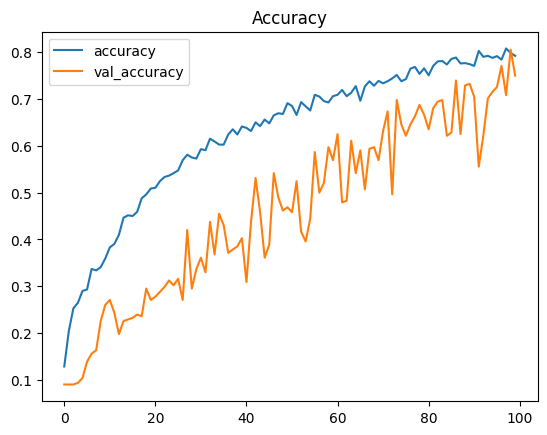

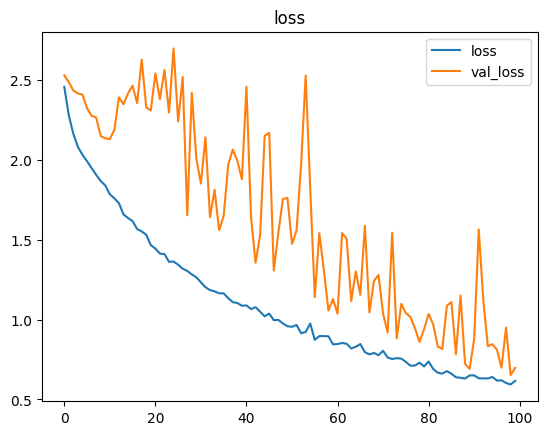

In [19]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("loss")
plt.show()

In [20]:
results = model.evaluate(test_gen, verbose=0)
print("   Test loss:  {:.5f}".format(results[0]))
print("Test Accuracy:  {:.2f}%".format(results[1] * 100))

   Test loss:  0.68614
Test Accuracy:  77.08%


In [21]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

5/5 [==============================] - 45s 8s/step


In [22]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

                precision    recall  f1-score   support

          IR20       0.17      0.13      0.15        31
         adt37       0.04      0.04      0.04        23
         amman       0.12      0.13      0.13        30
    andhra bpt       0.14      0.15      0.15        26
      eramalli       0.06      0.05      0.05        22
karuppu kavuni       0.08      0.08      0.08        26
       keerthi       0.03      0.06      0.04        18
      mtu 1010       0.00      0.00      0.00        25
      mtu 1290       0.06      0.05      0.05        21
      narmadha       0.08      0.08      0.08        24
   pacha ponni       0.11      0.13      0.12        23
   sonna masur       0.16      0.16      0.16        19

      accuracy                           0.09       288
     macro avg       0.09      0.09      0.09       288
  weighted avg       0.09      0.09      0.09       288



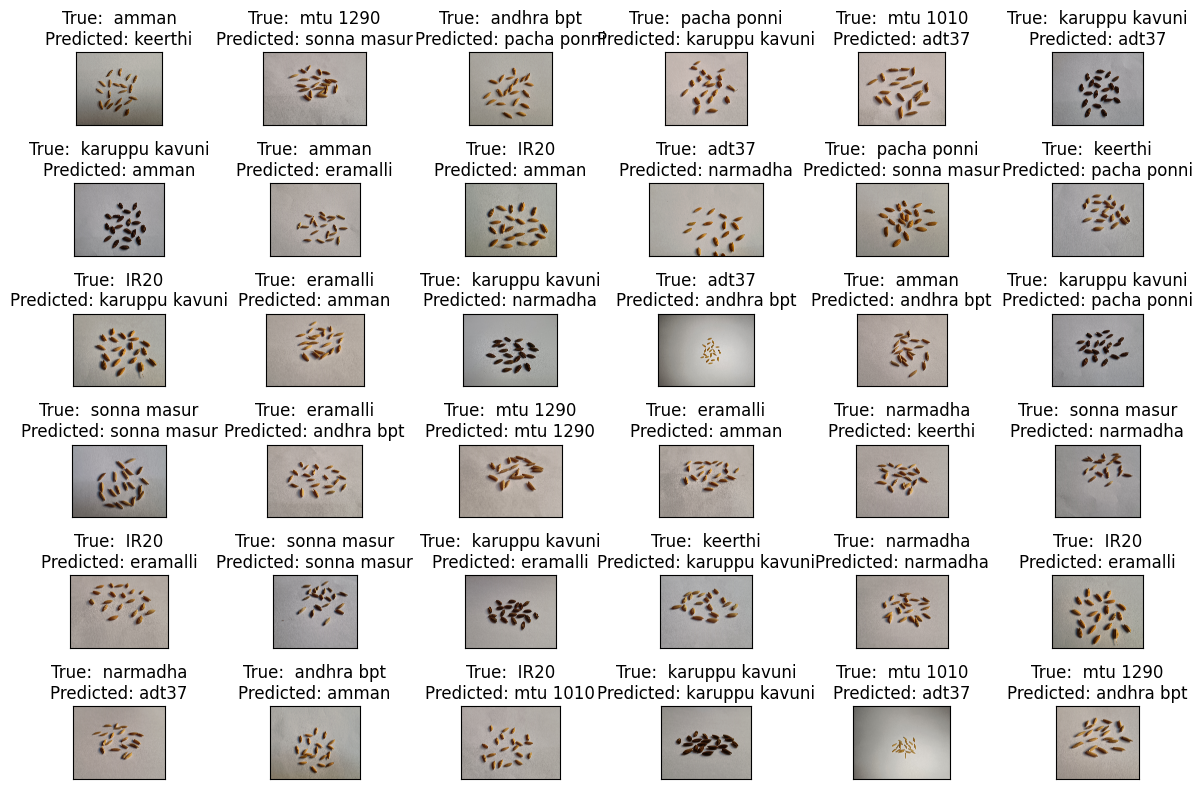

In [23]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(12,8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:  {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()